# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

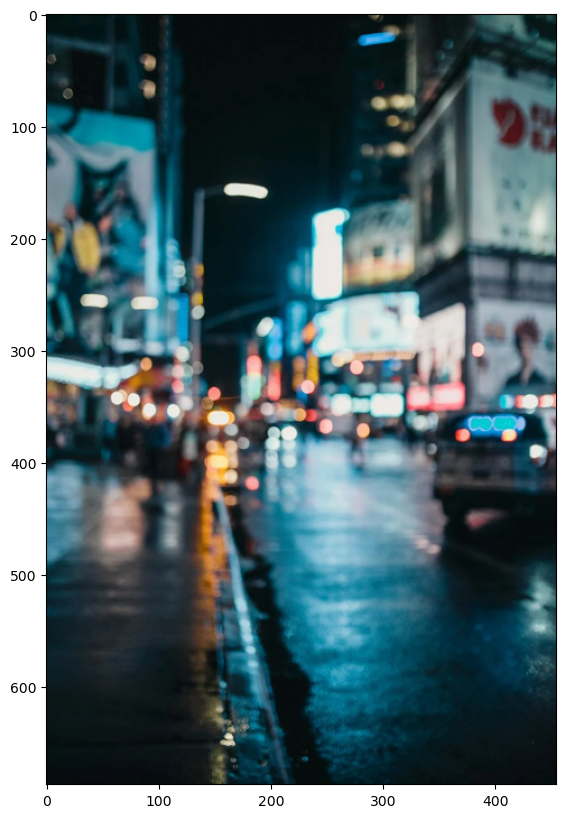

In [5]:
img = cv2.imread('../data/city_blur.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

(<Axes: >, <matplotlib.image.AxesImage at 0x13a995d10>)

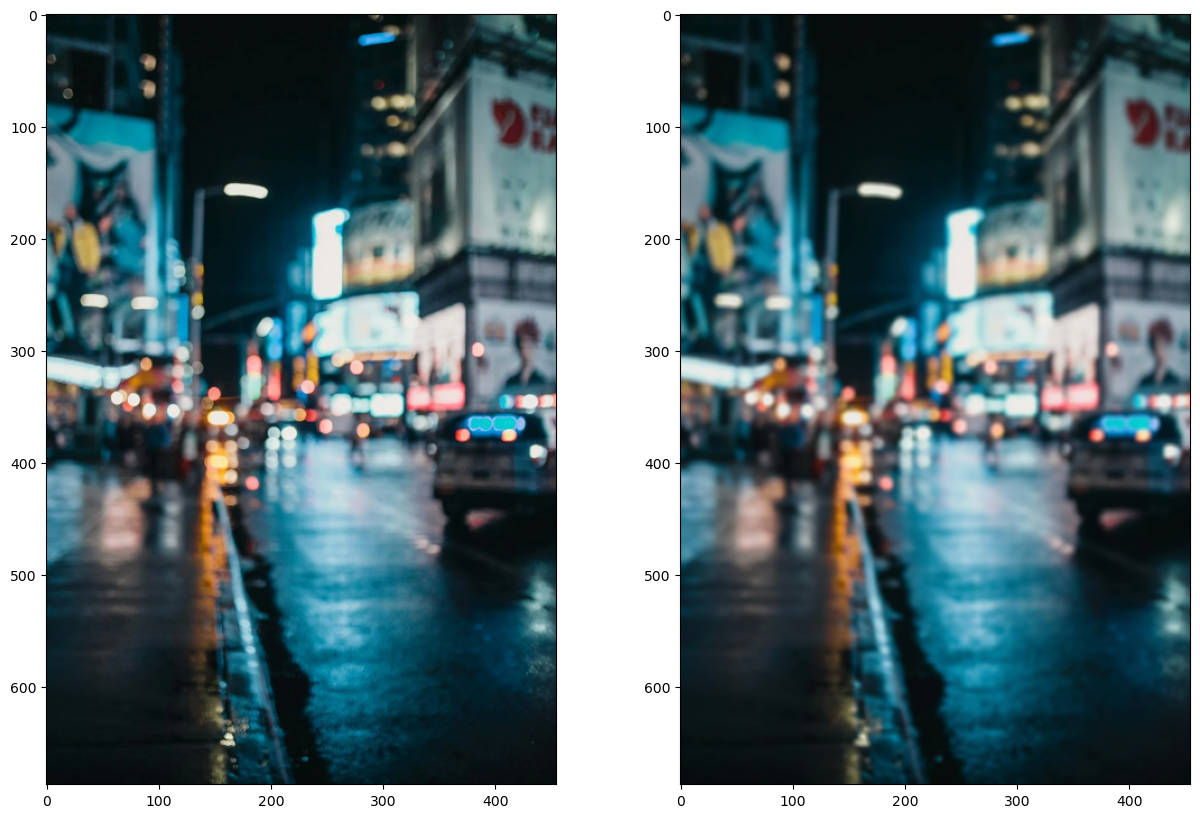

In [6]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, ksize=(5,5), sigmaX=5)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(unsharp)

(<Axes: >, <matplotlib.image.AxesImage at 0x13abf2350>)

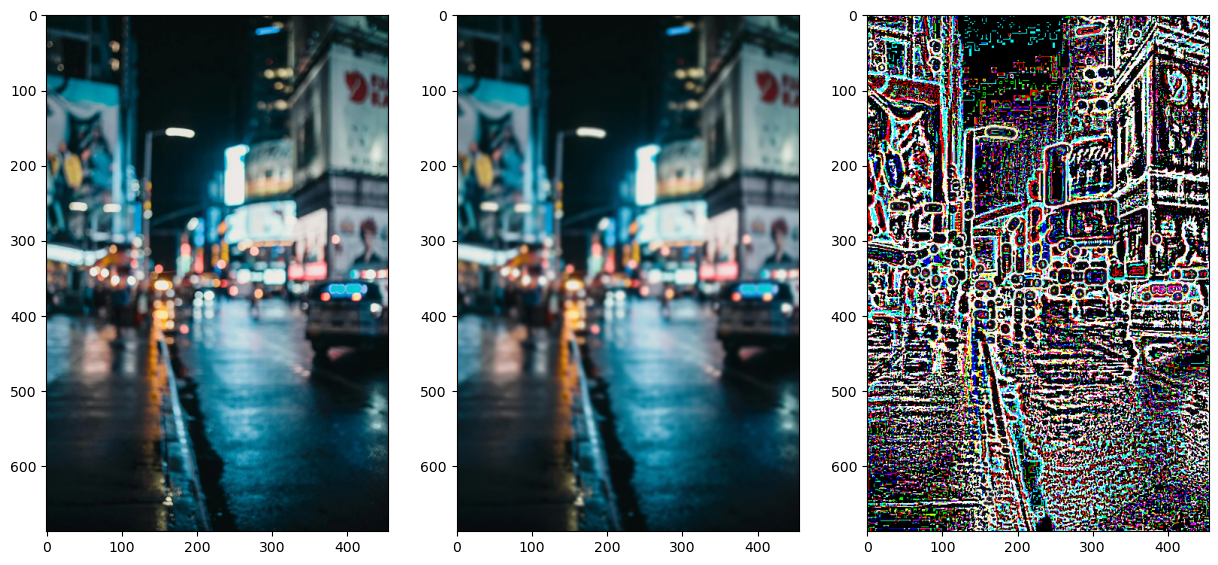

In [8]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or subtractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
diff = cv2.subtract(img.astype(np.float32), unsharp.astype(np.float32))

plt.subplot(131), plt.imshow(img)
plt.subplot(132), plt.imshow(unsharp)
plt.subplot(133), plt.imshow(diff.astype(np.uint8))

(<Axes: title={'center': 'Sharpened 0.5'}>,
 Text(0.5, 1.0, 'Sharpened 0.5'))

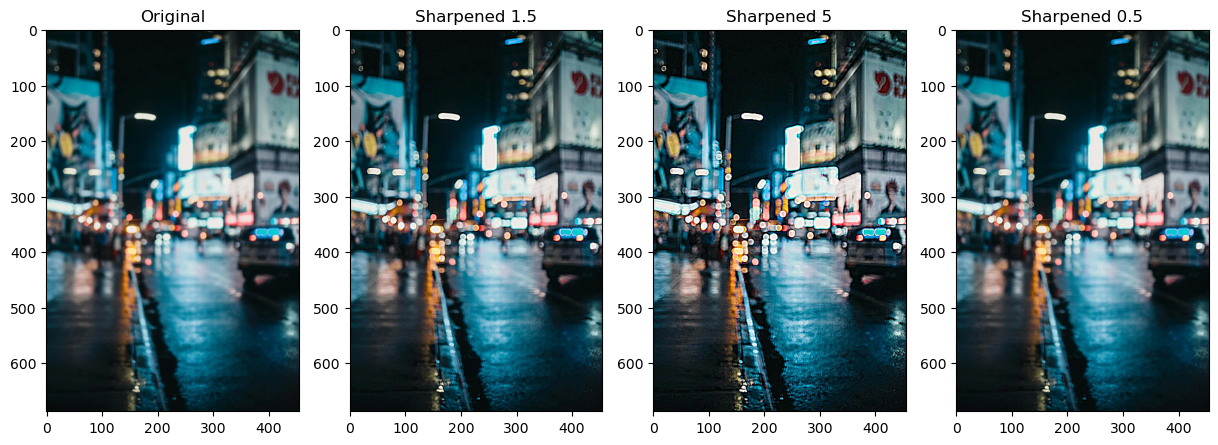

In [14]:
# Define the sharpened function
def sharpened(a):
    result = img.astype(np.float32) + (diff * a)

    # Step 3: Clip values to [0, 255] and convert back to uint8
    result = np.clip(result, 0, 255).astype(np.uint8)

    return result

# Demo usage of the function
# Plot results
plt.subplot(141), plt.imshow(img), plt.title('Original')
plt.subplot(142), plt.imshow(sharpened(1.5)), plt.title('Sharpened 1.5')
plt.subplot(143), plt.imshow(sharpened(5)), plt.title('Sharpened 5')
plt.subplot(144), plt.imshow(sharpened(0.55)), plt.title('Sharpened 0.5')

### Questions
* What is a good (reasonable) value for the `amount` parameter? Looks like not more than 2 or 3
 * What happens if it is too small? Not much is changed
 * What happens if it is too large? Artifacts begin to appear

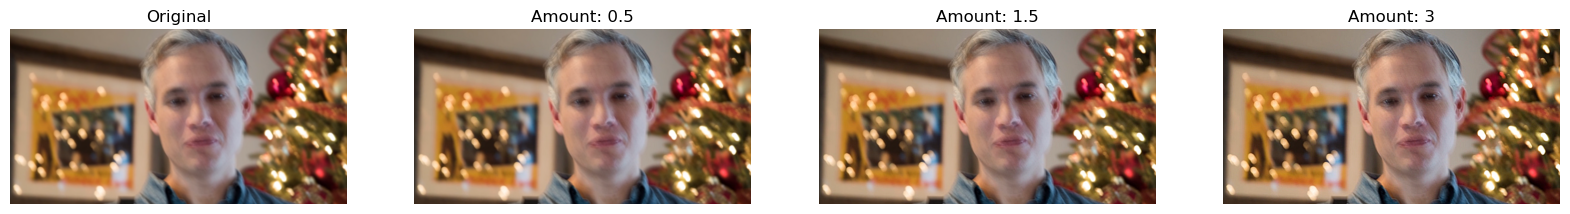

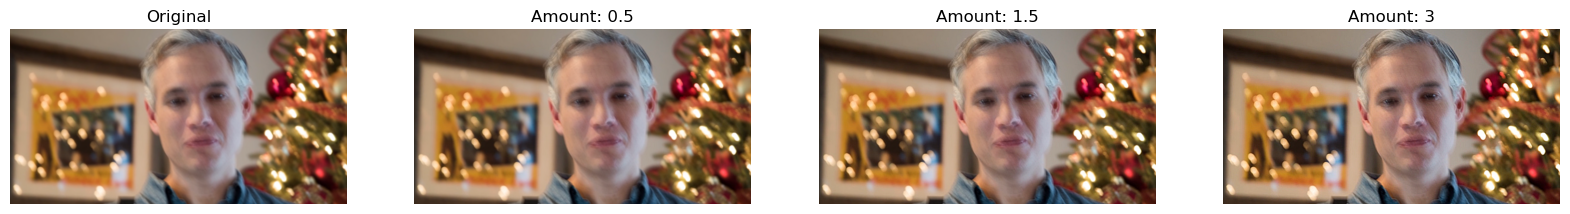

In [19]:
def sharpened2(source_img, a, sigma):
    unsharp_img = cv2.GaussianBlur(source_img, ksize=(5,5), sigmaX=sigma)
    diff_data = cv2.subtract(source_img.astype(np.float32), unsharp_img.astype(np.float32))

    result = source_img.astype(np.float32) + (diff_data * a)

    # Step 3: Clip values to [0, 255] and convert back to uint8
    result = np.clip(result, 0, 255).astype(np.uint8)

    return result

def display_amounts(source_img, a_array, sigma):
    plt.figure(figsize=(20, 10))
    columns = len(a_array) + 1

    plt.subplot(1, columns, 1)
    plt.imshow(source_img)
    plt.title("Original")
    plt.axis('off')

    for idx, a in enumerate(a_array):
        plt.subplot(1, columns, idx + 2)
        plt.imshow(sharpened2(source_img, a, sigma))
        plt.title(f"Amount: {a}")
        plt.axis('off')

img = cv2.imread('../data/portrait.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Example usage
display_amounts(img, [0.5, 1.5, 3], 5)
display_amounts(img, [0.5, 1.5, 3], 10)